**Data Preprocessing**

We need to check the images in our dataset for their sizes and number of color components

In [1]:
""" Import necessary libs"""

import pandas as pd
import numpy as np
import cv2 as cv
import os
import glob


In [3]:
""" Check image size and color components"""
df = pd.DataFrame()

targetdir = "images"
filelist = glob.glob(targetdir+str("/*"))
for file in filelist:
    img = cv.imread(file)
    img_shape = img.shape
    #print(img_shape)
    df = df.append(pd.Series(img_shape),ignore_index=True)
df = df.rename(columns={0: "Width", 1: "Height", 2:"Components"})
df.head()

,Width,Height,Components
0,350.0,350.0,3.0
1,350.0,350.0,3.0
2,350.0,350.0,3.0
3,350.0,350.0,3.0
4,350.0,350.0,3.0


**Now we need to determine the minimum & maximum width and height from all the image sizes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13718 entries, 0 to 13717
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Width       13718 non-null  float64
 1   Height      13718 non-null  float64
 2   Components  13718 non-null  float64
dtypes: float64(3)
memory usage: 321.6 KB


In [5]:
df =df.rename(columns={"Rows": "Width", "Columns": "Height", 2:"Components"})
df.agg(['max', 'min', 'mean', 'std'])

,Width,Height,Components
max,536.000000,441.000000,3.0
min,24.000000,18.000000,3.0
mean,335.768698,333.548039,3.0
std,58.700772,63.898948,0.0


In [6]:
# Load in image data
image_info = pd.read_csv('data/legend.csv',delimiter=',')
image_info.head()
image_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13690 entries, 0 to 13689
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user.id  13690 non-null  object
 1   image    13690 non-null  object
 2   emotion  13690 non-null  object
dtypes: object(3)
memory usage: 321.0+ KB


In [7]:
image_info.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


In [8]:
image_info["emotion"].unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt', 'NEUTRAL', 'SADNESS', 'DISGUST', 'FEAR',
       'SURPRISE', 'ANGER', 'HAPPINESS'], dtype=object)

In [9]:
image_info["emotion"].value_counts()

neutral      6717
happiness    5309
HAPPINESS     387
surprise      356
anger         228
DISGUST       195
NEUTRAL       151
SADNESS       144
sadness       124
ANGER          24
fear           13
disgust        13
SURPRISE       12
contempt        9
FEAR            8
Name: emotion, dtype: int64

In [10]:
# converting the emotion string to lowercase
image_info["emotion"] = image_info["emotion"].str.lower()
image_info["emotion"].value_counts()

neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
fear           21
contempt        9
Name: emotion, dtype: int64

It can be easily noticable that the emotion categories are not equally distributed here. Hence we need to drop some images from neutral and happiness category to make the distribution even for all categories.

In [11]:
""" Merge the contempt into disgust category"""
image_info["emotion"] = image_info["emotion"].replace("contempt","disgust")

In [12]:
image_info["emotion"].value_counts()

neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       217
fear           21
Name: emotion, dtype: int64

In [13]:
#shuffle the dataset , iterate over it and select 500 images from neutral and happiness category
image_info = image_info.sample(frac=1).reset_index(drop=True)

In [18]:
#if shuffle is performed again remove already selected images and perform the partition using below cell again
#!rm -f selectedImages/*

In [23]:
#move above selected images into a separate dataset folder
neutral = 0
happy = 0
selectedImages = pd.DataFrame(columns=["image","emotion"])
for index, row in image_info.iterrows():
    #if happy >= 500 and neutral >=500:
     #   break
    if row["emotion"] == "happiness":
        happy += 1
        if happy > 500:
            continue
    elif row["emotion"] == "neutral":
        neutral += 1
        if neutral > 500:
            continue
    selectedImages = selectedImages.append(pd.Series(row),ignore_index=True)
    #print(row)
    
    ##uncomment if need to copy the images to another folder
    
    #cmdstring = "cp images/{} selectedImages/.".format(row["image"])
    #os.system(cmdstring)

In [24]:

selectedImages["emotion"].value_counts()

neutral      500
happiness    500
surprise     368
sadness      268
anger        252
disgust      217
fear          21
Name: emotion, dtype: int64

In [25]:
!ls -l selectedImages/ | wc -l

2126


In [26]:

selectedImages = selectedImages.drop(['user.id'], axis=1) #we donot need user.id

In [27]:
selectedImages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    2126 non-null   object
 1   emotion  2126 non-null   object
dtypes: object(2)
memory usage: 33.3+ KB


In [28]:
#divide this dataset into test train and validation set
train, validate, test = np.split(selectedImages.sample(frac=1), [int(.6*len(selectedImages)), int(.8*len(selectedImages))])

#https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 41 to 1714
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    1275 non-null   object
 1   emotion  1275 non-null   object
dtypes: object(2)
memory usage: 29.9+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 514 to 474
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    426 non-null    object
 1   emotion  426 non-null    object
dtypes: object(2)
memory usage: 10.0+ KB


In [32]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 492 to 1955
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    425 non-null    object
 1   emotion  425 non-null    object
dtypes: object(2)
memory usage: 10.0+ KB


In [33]:
train["emotion"].value_counts()

neutral      305
happiness    294
surprise     217
sadness      163
anger        155
disgust      127
fear          14
Name: emotion, dtype: int64

In [34]:
validate["emotion"].value_counts()

happiness    107
neutral      104
surprise      68
sadness       53
disgust       47
anger         45
fear           1
Name: emotion, dtype: int64

In [35]:
test["emotion"].value_counts()

happiness    99
neutral      91
surprise     83
anger        52
sadness      52
disgust      43
fear          6
Name: emotion, dtype: int64

In [50]:
def categorical2Numerical(df):
    category = {'happiness': 0, 'neutral': 1, 'surprise':2, 'anger':3, 'sadness': 4, 'disgust':5, 'fear':6}
    df.emotion = [category[item] for item in df.emotion]
    return df
train["emotion"].value_counts()

1    305
0    294
2    217
4    163
3    155
5    127
6     14
Name: emotion, dtype: int64

In [55]:
#saving category mapping so when we need to reverse map the value to it's original emotion 
import json

with open('category.json', 'w') as fp:
    json.dump(category, fp)

In [51]:

validate = categorical2Numerical(validate)
test = categorical2Numerical(test)


In [52]:
validate["emotion"].value_counts()

0    107
1    104
2     68
4     53
5     47
3     45
6      1
Name: emotion, dtype: int64

In [53]:
test["emotion"].value_counts()

0    99
1    91
2    83
4    52
3    52
5    43
6     6
Name: emotion, dtype: int64

In [67]:

def dropColumn(df,i):
    df = df.drop(df.columns[i], axis=1)
    return df

In [68]:
train= dropColumn(train,0)
train.head()

,emotion
41,1
381,1
107,0
1172,4
1912,2


From above the distribution looks justified for each category of emotions.

In [54]:
#we need to save this selected images data frame into a csv files so that we can load them again as they are.
selectedImages.to_csv('selectedImages.csv')
train.to_csv('train.csv')
validate.to_csv('validate.csv')
test.to_csv('test.csv')

In [38]:
def moveImageToFolder(df, folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
    for index, row in df.iterrows():
        cmdstring = "mv selectedImages/{} {}/.".format(row["image"],folder)
        os.system(cmdstring)

In [39]:
moveImageToFolder(train,"selectedImages/train")

In [40]:
moveImageToFolder(validate,"selectedImages/valid")
moveImageToFolder(test,"selectedImages/test")

In [95]:
def createCategoryFolder(df, folder):
    category = {0:'happiness', 1:'neutral', 2:'surprise', 3:'anger', 4:'sadness', 5:'disgust', 6:'fear'}
    for index, row in df.iterrows():
        
        currentPath = os.path.join(folder,category[row["emotion"]])
        if not os.path.exists(currentPath):
            os.makedirs(currentPath)
        cmdstring = "mv {}/{} {}/.".format(folder,row["image"],currentPath)
        print(cmdstring)
        os.system(cmdstring)

In [88]:
train = pd.read_csv('selectedImages/train.csv',delimiter=',')


In [ ]:
createCategoryFolder(train,"selectedImages/train")

In [ ]:
createCategoryFolder(test,"selectedImages/test")

In [ ]:
createCategoryFolder(validate,"selectedImages/valid")

In [21]:
import boto3
import sagemaker

In [22]:
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [23]:

# should be the name of directory you created to save your features data
data_dir = 'selectedImages'

# set prefix, a descriptive name for a directory  
prefix = 'emotion-detection'

# upload all data to S3
#input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)

In [4]:
# confirm that data is in S3 bucket

empty_check = []
for obj in boto3.resource('s3').Bucket(bucket).objects.all():
    empty_check.append(obj.key)
    print(obj.key)
    break
print(len(empty_check))
assert len(empty_check) !=0, 'S3 bucket is empty.'
print('Test passed!')

emotion-detection/output/sagemaker-pytorch-2020-12-04-17-51-14-952/debug-output/training_job_end.ts
1
Test passed!


In [24]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [25]:
train_dir = './' + data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [51]:
import torch
import torch.utils.data
import pandas as pd
import os

# Read in only the first 250 rows
train_sample = pd.read_csv(os.path.join(data_dir, 'train.csv'), names=None, nrows=50)

# Turn the input pandas dataframe into tensors
#print(train_sample.head())
#train_sample_y = torch.from_numpy(train_sample['emotion'].values)
train_transforms = transforms.Compose([transforms.Grayscale(1),
                                       transforms.RandomRotation(30, fill=(0,)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, ), (0.5, ))])
valid_transforms = transforms.Compose([transforms.Grayscale(1),
                                       transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, ), (0.5, ))])
test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
# Build the dataset

train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
# TODO: Using the image datasets and the trainforms, define the dataloaders


trainloader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=10, shuffle=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=1,shuffle=True)

In [9]:
#!pygmentize model.py

In [10]:
#!pygmentize train.py

In [23]:
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

class EmotionClassifier(nn.Module):
    """
    This is the simple CNN model we will be using to perform emotion classification for seven emotions
    """

    def __init__(self):
        """
        Initialize the model by settingg up the various layers.
        """
        super(EmotionClassifier, self).__init__()
        
        self.cnn_layers = nn.Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            # adding batch normalization
            BatchNorm2d(32),
            MaxPool2d(kernel_size=2, stride=2),
            # adding dropout
            Dropout(p=0.25),
            # Defining another 2D convolution layer
            Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            # adding batch normalization
            BatchNorm2d(64),
            MaxPool2d(kernel_size=2, stride=2),
            # adding dropout
            Dropout(p=0.25),
            # Defining another 2D convolution layer
            Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            # adding batch normalization
            BatchNorm2d(128),
            MaxPool2d(kernel_size=2, stride=2),
            # adding dropout
            Dropout(p=0.25),
            # Defining another 2D convolution layer
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            ReLU(inplace=True),
            # adding batch normalization
            BatchNorm2d(128),
            MaxPool2d(kernel_size=2, stride=2),
            # adding dropout
            Dropout(p=0.25),
        )

        self.linear_layers = nn.Sequential(
            Linear(128 * 14 * 14, 512),
            ReLU(inplace=True),
            Dropout(),
            Linear(512, 256),
            ReLU(inplace=True),
            Dropout(),
            Linear(256,84),
            ReLU(inplace=True),
            Dropout(),
            Linear(84,7)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x


In [70]:
def train(model, train_loader, epochs, optimizer, loss_fn, device):
    prev_acc = 0
    accuracy = 0
    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0
        for batch in train_loader:         
        #for batch_idx, (data, target) in enumerate(train_loader):
            batch_X, batch_y = batch
            
            batch_X = batch_X.to(device)
            batch_y = batch_y.to(device)
            
            # TODO: Complete this train method to train the model provided.
            optimizer.zero_grad()

            logps = model.forward(batch_X)
            m = nn.LogSoftmax(dim=1)
            #nll_loss = nn.NLLLoss()
            #output = nll_loss(m(input), target)
            loss = loss_fn(m(logps), batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.data.item()
        print("Epoch: {}, NLLLoss: {}".format(epoch, total_loss / len(train_loader)))
        model.eval()
        valid_loss = 0
        #accuracy = 0
        with torch.no_grad():
            for inputs, labels in validloader:
                inputs, labels = inputs.to(device), labels.to(device)
                logps = model.forward(inputs)
                m = nn.LogSoftmax(dim=1)
                batch_loss = loss_fn(m(logps), labels)

                valid_loss += batch_loss.item()

                # Calculate accuracy
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                valid_acc = accuracy/len(validloader)

        print(f"Epoch {epoch+1}/{epochs}.. "
      f"Train loss: {total_loss / len(train_loader):.3f}.. "
      f"Valid loss: {valid_loss/len(validloader):.3f}.. "
      f"Validation accuracy: {valid_acc:.3f}")
        
        model.train()
        if valid_acc-prev_acc < .1 and valid_acc > .9:
            break
        else:
            prev_acc = valid_acc

In [31]:
import torch.optim as optim
#import EmotionClassifier as E
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = EmotionClassifier().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.002)
loss_fn = torch.nn.NLLLoss() #torch.nn.BCELoss()

#train(model, trainloader, 2, optimizer, loss_fn, device)

In [ ]:
!pip install sagemaker-containers

In [27]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(entry_point="train.py",
                    source_dir="./",
                    role=role,
                    framework_version='1.0.0',
                    py_version='py3',
                    train_instance_count=1,
                    train_instance_type='ml.p2.xlarge',
                    output_path='s3://{}/{}/modelOutput'.format(sagemaker_session.default_bucket(), prefix),
                    hyperparameters={
                        'epochs': 200,
                        'learning_rate': 0.002
                    })

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [8]:
output_path='s3://{}/{}'.format(sagemaker_session.default_bucket(), prefix)
#estimator.fit({'train':s3://my-bucket/training_data})

In [9]:
print(output_path)

s3://sagemaker-us-east-2-769207522942/emotion-detection


In [15]:
upload_data = sagemaker_session.upload_data(path='./requirements.txt', bucket=bucket, key_prefix=prefix)

print('upload_data : {}'.format(upload_data))
#sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)

upload_data : s3://sagemaker-us-east-2-769207522942/emotion-detection/requirements.txt


In [28]:
estimator.fit({'training':output_path})

2020-12-15 16:15:32 Starting - Starting the training job...
2020-12-15 16:15:56 Starting - Launching requested ML instancesProfilerReport-1608048905: InProgress
......
2020-12-15 16:16:57 Starting - Preparing the instances for training.........
2020-12-15 16:18:28 Downloading - Downloading input data.........
2020-12-15 16:20:01 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-12-15 16:20:03,272 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-12-15 16:20:03,301 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-12-15 16:20:03,302 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-12-15 16:20:15,205 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-12-15 16:20:15,206 sagemaker-containers INFO

  Running setup.py bdist_wheel for train: finished with status 'done'
  Stored in directory: /tmp/pip-ephem-wheel-cache-vceiy6wl/wheels/35/24/16/37574d11bf9bde50616c67372a334f94fa8356bc7164af8ca3
  Running setup.py bdist_wheel for inotify-simple: started
  Running setup.py bdist_wheel for inotify-simple: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/28/77/f9/52cc89b27110b3fe0df40290275bd1151db9d0c7b15733cc3b
  Running setup.py bdist_wheel for psutil: started
  Running setup.py bdist_wheel for psutil: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/42/32/da/8b12fd6b138c733efd03cfde6c6c8191a32842f9e82aa45fbf
Successfully built sagemaker-containers train inotify-simple psutil
  Found existing installation: Werkzeug 0.15.4
    Uninstalling Werkzeug-0.15.4:
      Successfully uninstalled Werkzeug-0.15.4
  Found existing installation: Flask 1.0.3
    Uninstalling Flask-1.0.3:
      Successfully uninstalled Flask-1.0.3
  Found existing i

Epoch: 16, NLLLoss: 1.518724194594792
Epoch 17/200.. Train loss: 1.519.. Valid loss: 1.488.. Validation accuracy: 0.334
Epoch: 17, NLLLoss: 1.5183024576732091
Epoch 18/200.. Train loss: 1.518.. Valid loss: 1.471.. Validation accuracy: 0.362
Epoch: 18, NLLLoss: 1.5628426330430167
Epoch 19/200.. Train loss: 1.563.. Valid loss: 1.631.. Validation accuracy: 0.281
Epoch: 19, NLLLoss: 1.5716211880956377
Epoch 20/200.. Train loss: 1.572.. Valid loss: 1.504.. Validation accuracy: 0.332
Epoch: 20, NLLLoss: 1.5208437613078527
Epoch 21/200.. Train loss: 1.521.. Valid loss: 1.565.. Validation accuracy: 0.330
Epoch: 21, NLLLoss: 1.524686370577131
Epoch 22/200.. Train loss: 1.525.. Valid loss: 1.485.. Validation accuracy: 0.308
Epoch: 22, NLLLoss: 1.534466300691877
Epoch 23/200.. Train loss: 1.534.. Valid loss: 1.464.. Validation accuracy: 0.389
Epoch: 23, NLLLoss: 1.5259496825081962
Epoch 24/200.. Train loss: 1.526.. Valid loss: 1.538.. Validation accuracy: 0.329
Epoch: 24, NLLLoss: 1.5049307176045

Epoch: 76, NLLLoss: 1.3838204060282027
Epoch 77/200.. Train loss: 1.384.. Valid loss: 1.451.. Validation accuracy: 0.457
Epoch: 77, NLLLoss: 1.3785628506115504
Epoch 78/200.. Train loss: 1.379.. Valid loss: 1.412.. Validation accuracy: 0.458
Epoch: 78, NLLLoss: 1.396346160343715
Epoch 79/200.. Train loss: 1.396.. Valid loss: 1.324.. Validation accuracy: 0.474
Epoch: 79, NLLLoss: 1.3827436055455888
Epoch 80/200.. Train loss: 1.383.. Valid loss: 1.382.. Validation accuracy: 0.436
Epoch: 80, NLLLoss: 1.320404393332345
Epoch 81/200.. Train loss: 1.320.. Valid loss: 1.395.. Validation accuracy: 0.477
Epoch: 81, NLLLoss: 1.3871208940233504
Epoch 82/200.. Train loss: 1.387.. Valid loss: 1.391.. Validation accuracy: 0.466
Epoch: 82, NLLLoss: 1.3640632118497575
Epoch 83/200.. Train loss: 1.364.. Valid loss: 1.400.. Validation accuracy: 0.477
Epoch: 83, NLLLoss: 1.3562518443380083
Epoch 84/200.. Train loss: 1.356.. Valid loss: 1.410.. Validation accuracy: 0.424
Epoch: 84, NLLLoss: 1.355890665735

Epoch: 135, NLLLoss: 1.2053891207490648
Epoch 136/200.. Train loss: 1.205.. Valid loss: 1.713.. Validation accuracy: 0.434
Epoch: 136, NLLLoss: 1.211926817893982
Epoch 137/200.. Train loss: 1.212.. Valid loss: 1.323.. Validation accuracy: 0.501
Epoch: 137, NLLLoss: 1.2358261431966509
Epoch 138/200.. Train loss: 1.236.. Valid loss: 1.378.. Validation accuracy: 0.464
Epoch: 138, NLLLoss: 1.2551274384771074
Epoch 139/200.. Train loss: 1.255.. Valid loss: 1.283.. Validation accuracy: 0.522
Epoch: 139, NLLLoss: 1.183439735855375
Epoch 140/200.. Train loss: 1.183.. Valid loss: 1.393.. Validation accuracy: 0.465
Epoch: 140, NLLLoss: 1.225750914641789
Epoch 141/200.. Train loss: 1.226.. Valid loss: 1.283.. Validation accuracy: 0.516
Epoch: 141, NLLLoss: 1.2028886420386178
Epoch 142/200.. Train loss: 1.203.. Valid loss: 1.325.. Validation accuracy: 0.500
Epoch: 142, NLLLoss: 1.249782383441925
Epoch 143/200.. Train loss: 1.250.. Valid loss: 1.372.. Validation accuracy: 0.496
Epoch: 143, NLLLoss:

Epoch: 194, NLLLoss: 1.12204144682203
Epoch 195/200.. Train loss: 1.122.. Valid loss: 1.334.. Validation accuracy: 0.507
Epoch: 195, NLLLoss: 1.0925083756446838
Epoch 196/200.. Train loss: 1.093.. Valid loss: 1.214.. Validation accuracy: 0.566
Epoch: 196, NLLLoss: 1.1931924266474587
Epoch 197/200.. Train loss: 1.193.. Valid loss: 1.328.. Validation accuracy: 0.516
Epoch: 197, NLLLoss: 1.1347325869968958
Epoch 198/200.. Train loss: 1.135.. Valid loss: 1.279.. Validation accuracy: 0.531
Epoch: 198, NLLLoss: 1.1133912418569838
Epoch 199/200.. Train loss: 1.113.. Valid loss: 1.291.. Validation accuracy: 0.551
Epoch: 199, NLLLoss: 1.133009203842708
Epoch 200/200.. Train loss: 1.133.. Valid loss: 1.243.. Validation accuracy: 0.553
Epoch: 200, NLLLoss: 1.1060068011283875
Epoch 201/200.. Train loss: 1.106.. Valid loss: 1.304.. Validation accuracy: 0.532
2020-12-15 16:54:34,113 sagemaker-containers INFO     Reporting training SUCCESS

2020-12-15 16:55:27 Uploading - Uploading generated training

In [32]:
model = EmotionClassifier()

model_dir = "./"
model_path = os.path.join(model_dir, 'model.pth')
with open(model_path, 'rb') as f:
    model.load_state_dict(torch.load(f))
#model =model.load_state_dict(torch.load())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = vgg16
model.to(device)
test_loss = 0
accuracy = 0
y_true = []
y_pred = []

model.to(device)
test_loss = 0
accuracy = 0
with torch.no_grad():
    model.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        y_true.append(labels.item())
        m = nn.LogSoftmax(dim=1)
        batch_loss = loss_fn(m(logps), labels)

        test_loss += batch_loss.item()
        #accuracy = 0
        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        y_pred.append(top_class.item())
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test loss: {test_loss/len(testloader):.3f}.. "
	f"Test accuracy: {accuracy/len(testloader):.3f}")

Test loss: 2.698.. Test accuracy: 0.284


### This test accuracy has been obtained at the very first trained model.

In [81]:
from sagemaker.tuner import HyperparameterTuner, ContinuousParameter, IntegerParameter
my_tuner = HyperparameterTuner(estimator=estimator,  # previously-configured Estimator object
                               objective_metric_name='validation-accuracy',
                               hyperparameter_ranges={'learning_rate': ContinuousParameter(0.001, 0.01)
                                                     },
                               metric_definitions=[{'Name': 'validation-accuracy', 'Regex': 'Validation accuracy: (\d\.\d+)'}],
                               max_jobs=10,
                               max_parallel_jobs=3,
                               early_stopping_type='Auto')

NameError: name 'estimator' is not defined

In [ ]:
my_tuner.fit({'training':output_path})

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................__s


In [29]:
# Get the name of the training job, 
training_job_name='sagemaker-pytorch-2020-12-15-16-15-05-577'

# where the model is saved, by default
model_key = os.path.join(prefix, "modelOutput",training_job_name, 'output/model.tar.gz')
print(model_key)

#s3://sagemaker-us-east-2-769207522942/emotion-detection/output/sagemaker-pytorch-2020-12-05-09-07-48-004/output/model.tar.gz 
# download and unzip model
boto3.resource('s3').Bucket(bucket).download_file(model_key, 'model.tar.gz')

# unzipping as model_algo-1
os.system('tar -zxvf model.tar.gz')
os.system('unzip model_algo-1')

emotion-detection/modelOutput/sagemaker-pytorch-2020-12-15-16-15-05-577/output/model.tar.gz


2304

In [9]:
!rm -f model.pth

In [53]:
#from sagemaker.pytorch import PyTorchModel
#model = PyTorchModel(model_data=estimator.model_data,
#                     role = role,
#                     framework_version='1.0.0',
#                     py_version='py3')
"""model = EmotionClassifier()

    # Load the store model parameters.
    model_path = os.path.join(model_dir, 'model.pth')
    with open(model_path, 'rb') as f:
        model.load_state_dict(torch.load(f))

    model.to(device).eval()"""
y_true = []
y_pred = []
from model import EmotionClassifier
model = EmotionClassifier()
model_dir = "./"
model_path = os.path.join(model_dir, 'model.pth')
with open(model_path, 'rb') as f:
    model.load_state_dict(torch.load(f))
#model =model.load_state_dict(torch.load())
model.to(device)
test_loss = 0
accuracy = 0
with torch.no_grad():
    model.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        l = [element.item() for element in labels.flatten()]#labels.flatten().item().tolist()
        y_true.append(l)
        m = nn.LogSoftmax(dim=1)
        batch_loss = loss_fn(m(logps), labels)

        test_loss += batch_loss.item()
        #accuracy = 0
        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        l = [element.item() for element in top_class.flatten()]
        y_pred.append(l)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test loss: {test_loss/len(testloader):.3f}.. "
	f"Test accuracy: {accuracy/len(testloader):.3f}")

Test loss: 1.519.. Test accuracy: 0.495


Classification Report
              precision    recall  f1-score   support

       anger       0.57      0.31      0.40        52
     disgust       0.48      0.60      0.54        43
        fear       0.00      0.00      0.00         6
   happiness       0.51      0.79      0.62        99
     neutral       0.38      0.49      0.43        91
     sadness       0.38      0.15      0.22        52
    surprise       0.59      0.39      0.47        83

    accuracy                           0.48       426
   macro avg       0.42      0.39      0.38       426
weighted avg       0.48      0.48      0.46       426

Confusion Matrix
[[16  2  0 10 15  3  6]
 [ 1 26  0  6  1  8  1]
 [ 0  4  0  0  2  0  0]
 [ 3  4  0 78 11  1  2]
 [ 2  3  0 30 45  0 11]
 [ 2 14  0 12 14  8  2]
 [ 4  1  0 16 29  1 32]]


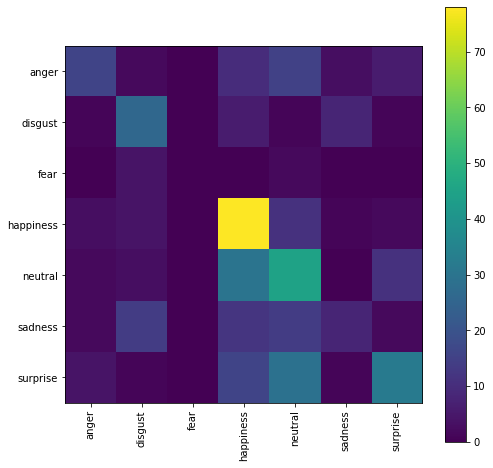

In [44]:

import matplotlib.pyplot as plt
#class_labels = {v: k for k, v in class_labels.items()}
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

target_names = (test_data.class_to_idx).keys()
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))


plt.figure(figsize=(8,8))
#y = np.argmax(y_pred, axis=1)
cnf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cnf_matrix)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(target_names))
_ = plt.xticks(tick_marks, target_names, rotation=90)
_ = plt.yticks(tick_marks, target_names)

In [52]:
print(model)

EmotionClassifier(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.25, inplace=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.25, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.25, inplace=False)

In [53]:
import torchvision.models as models

In [54]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/ec2-user/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [55]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
import torch.nn as nn
vgg16.classifier[6] = nn.Linear(4096,7)

In [ ]:
model = models.vgg16()
model.classifier = nn.Sequential(nn.Linear(25088, 4096),
                                         nn.ReLU(),
                                         nn.Dropout(0.2),
                                         nn.Linear(4096, 1024),
                                         nn.ReLU(),
                                         nn.Dropout(0.2),
                                         nn.Linear(1024,512),
                                         nn.ReLU(),
                                         nn.Dropout(0.2),
                                         nn.Linear(512, 7))
model_dir = "./"
model_path = os.path.join(model_dir, 'modelVGG.pth')
with open(model_path, 'rb') as f:
    model.load_state_dict(torch.load(f))
#model =model.load_state_dict(torch.load())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = vgg16
model.to(device)
test_loss = 0
accuracy = 0
with torch.no_grad():
    model.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        m = nn.LogSoftmax(dim=1)
        batch_loss = loss_fn(m(logps), labels)

        test_loss += batch_loss.item()
        #accuracy = 0
        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        print(f"Test loss: {test_loss/len(testloader):.3f}.. "
                f"Test accuracy: {accuracy/len(testloader):.3f}")
print(f"Test loss: {test_loss/len(testloader):.3f}.. "
	f"Test accuracy: {accuracy/len(testloader):.3f}")

In [12]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(entry_point="train-PreTrained.py",
                    source_dir="./",
                    role=role,
                    framework_version='1.0.0',
                    py_version='py3',
                    train_instance_count=1,
                    train_instance_type='ml.p2.xlarge',
                    output_path='s3://{}/{}/output'.format(sagemaker_session.default_bucket(), prefix),
                    hyperparameters={
                        'epochs': 70,
                        'learning_rate': 0.0008,
                        'model_name':"alexnet"
                    })

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [13]:
estimator.fit({'training':output_path})

2020-12-12 09:47:37 Starting - Starting the training job...
2020-12-12 09:48:00 Starting - Launching requested ML instancesProfilerReport-1607766423: InProgress
......
2020-12-12 09:49:01 Starting - Preparing the instances for training.........
2020-12-12 09:50:23 Downloading - Downloading input data.........
2020-12-12 09:52:03 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-12-12 09:52:15,554 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-12-12 09:52:15,580 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-12-12 09:52:15,581 sagemaker_pytorch_container.training INFO     Invoking user training script.

2020-12-12 09:52:24 Training - Training image download completed. Training in progress.2020-12-12 09:52:32,394 sagemaker-containers INFO     Module train-PreTrained does not provide a setup.

  Running setup.py bdist_wheel for train-PreTrained: finished with status 'done'
  Stored in directory: /tmp/pip-ephem-wheel-cache-x0g6kxa9/wheels/35/24/16/37574d11bf9bde50616c67372a334f94fa8356bc7164af8ca3
  Running setup.py bdist_wheel for inotify-simple: started
  Running setup.py bdist_wheel for inotify-simple: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/28/77/f9/52cc89b27110b3fe0df40290275bd1151db9d0c7b15733cc3b
  Running setup.py bdist_wheel for psutil: started
  Running setup.py bdist_wheel for psutil: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/42/32/da/8b12fd6b138c733efd03cfde6c6c8191a32842f9e82aa45fbf
Successfully built sagemaker-containers train-PreTrained inotify-simple psutil
  Found existing installation: Werkzeug 0.15.4
    Uninstalling Werkzeug-0.15.4:
      Successfully uninstalled Werkzeug-0.15.4
  Found existing installation: Flask 1.0.3
    Uninstalling Flask-1.0.3:
      Successfully uninstalled Flask-1.

Epoch: 14, NLLLoss: 1.498760163784027
Epoch 15/70.. Train loss: 1.499.. Valid loss: 1.383.. Validation accuracy: 0.479
Epoch: 15, NLLLoss: 1.500464391708374
Epoch 16/70.. Train loss: 1.500.. Valid loss: 1.246.. Validation accuracy: 0.524
Epoch: 16, NLLLoss: 1.5007070362567902
Epoch 17/70.. Train loss: 1.501.. Valid loss: 1.318.. Validation accuracy: 0.527
Epoch: 17, NLLLoss: 1.4883985340595245
Epoch 18/70.. Train loss: 1.488.. Valid loss: 1.280.. Validation accuracy: 0.490
Epoch: 18, NLLLoss: 1.4695859909057618
Epoch 19/70.. Train loss: 1.470.. Valid loss: 1.225.. Validation accuracy: 0.516
Epoch: 19, NLLLoss: 1.4495676100254058
Epoch 20/70.. Train loss: 1.450.. Valid loss: 1.262.. Validation accuracy: 0.512
Epoch: 20, NLLLoss: 1.4511398911476134
Epoch 21/70.. Train loss: 1.451.. Valid loss: 1.224.. Validation accuracy: 0.549
Epoch: 21, NLLLoss: 1.425150465965271
Epoch 22/70.. Train loss: 1.425.. Valid loss: 1.231.. Validation accuracy: 0.512
Epoch: 22, NLLLoss: 1.464549458026886
Epoch

In [31]:
#sagemaker-pytorch-2020-12-10-05-32-54-649##VGG
#sagemaker-pytorch-2020-12-12-09-47-03-727##Alex
#sagemaker-pytorch-2020-12-05-13-09-13-645 --27
#sagemaker-pytorch-2020-12-10-05-32-54-649
import os
training_job_name='sagemaker-pytorch-2020-12-10-05-32-54-649'

# where the model is saved, by default
model_key = os.path.join(prefix, "output",training_job_name, 'output/model.tar.gz')
print(model_key)

#s3://sagemaker-us-east-2-769207522942/emotion-detection/output/sagemaker-pytorch-2020-12-05-09-07-48-004/output/model.tar.gz 
# download and unzip model
boto3.resource('s3').Bucket(bucket).download_file(model_key, 'model.tar.gz')

# unzipping as model_algo-1
os.system('tar -zxvf model.tar.gz')

emotion-detection/output/sagemaker-pytorch-2020-12-10-05-32-54-649/output/model.tar.gz


0

In [12]:
!ls -l\

total 654676
-rw-rw-r-- 1 ec2-user ec2-user        96 Dec  4 06:17 category.json
drwxrwxr-x 2 ec2-user ec2-user      4096 Dec  3 12:14 data
-rw-rw-r-- 1 ec2-user ec2-user    359900 Dec 12 11:47 FacialExpression.ipynb
drwxrwxr-x 2 ec2-user ec2-user    638976 Dec  3 12:14 images
-rw-rw-r-- 1 ec2-user ec2-user     11357 Dec  3 12:14 LICENSE
-rw-r--r-- 1 ec2-user ec2-user 179787972 Dec 12 10:07 modelalexnet.pth
-rw-rw-r-- 1 ec2-user ec2-user      3212 Dec 12 10:44 model.py
-rw-r--r-- 1 ec2-user ec2-user 488817546 Dec 10 06:23 modelVGG.pth
-rw-rw-r-- 1 ec2-user ec2-user      2762 Dec  4 16:40 predict.py
drwxrwxr-x 2 ec2-user ec2-user      4096 Dec 11 08:19 __pycache__
drwxrwxr-x 2 ec2-user ec2-user      4096 Dec  3 12:14 python
drwxrwxr-x 2 ec2-user ec2-user      4096 Dec  3 12:14 R
-rw-rw-r-- 1 ec2-user ec2-user       963 Dec  3 12:14 README.md
-rw-rw-r-- 1 ec2-user ec2-user        20 Dec  5 12:33 requirements.txt
drwxrwxr-x 6 ec2-user ec2-user    618496 Dec  4 09:58 selectedImages
-rw-rw-

In [21]:
model = models.alexnet()
model.classifier = nn.Sequential(nn.Linear(9216, 4096),
                                             nn.ReLU(),
                                             nn.Dropout(0.2),
                                             nn.Linear(4096, 1024),
                                             nn.ReLU(),
                                             nn.Dropout(0.2),
                                             nn.Linear(1024,512),
                                             nn.ReLU(),
                                             nn.Dropout(0.2),
                                             nn.Linear(512, 7))
model_dir = "./"
model_path = os.path.join(model_dir, 'modelalexnet.pth')
with open(model_path, 'rb') as f:
    model.load_state_dict(torch.load(f))
#model =model.load_state_dict(torch.load())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = vgg16
model.to(device)
test_loss = 0
accuracy = 0
y_true = []
y_pred = []

model.to(device)
test_loss = 0
accuracy = 0
with torch.no_grad():
    model.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        y_true.append(labels.item())
        m = nn.LogSoftmax(dim=1)
        batch_loss = loss_fn(m(logps), labels)

        test_loss += batch_loss.item()
        #accuracy = 0
        # Calculate accuracy
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        y_pred.append(top_class.item())
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

print(f"Test loss: {test_loss/len(testloader):.3f}.. "
	f"Test accuracy: {accuracy/len(testloader):.3f}")

Test loss: 1.386.. Test accuracy: 0.502


Classification Report
              precision    recall  f1-score   support

       anger       0.46      0.31      0.37        52
     disgust       0.57      0.74      0.65        43
        fear       0.00      0.00      0.00         6
   happiness       0.58      0.63      0.60        99
     neutral       0.40      0.53      0.45        91
     sadness       0.44      0.27      0.33        52
    surprise       0.55      0.51      0.53        83

    accuracy                           0.50       426
   macro avg       0.43      0.43      0.42       426
weighted avg       0.50      0.50      0.49       426

Confusion Matrix
[[16  2  0 12 11  4  7]
 [ 2 32  0  2  2  5  0]
 [ 0  3  0  0  2  1  0]
 [ 6  3  0 62 23  2  3]
 [ 4  1  0 14 48  3 21]
 [ 2 14  0  8 11 14  3]
 [ 5  1  0  8 24  3 42]]


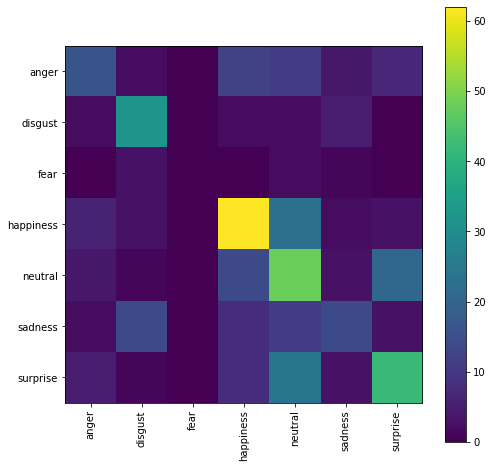

In [22]:
import matplotlib.pyplot as plt
#class_labels = {v: k for k, v in class_labels.items()}
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

target_names = (test_data.class_to_idx).keys()
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=target_names))


plt.figure(figsize=(8,8))
#y = np.argmax(y_pred, axis=1)
cnf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cnf_matrix)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(target_names))
_ = plt.xticks(tick_marks, target_names, rotation=90)
_ = plt.yticks(tick_marks, target_names)

In [82]:
import numpy as np
from torchvision import transforms
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    image_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                             std=[0.229, 0.224, 0.225])])
    
    return image_transforms(image)

In [83]:
def predict(image, model, topk=1):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''

    
    tensor_image = image
    inputs = tensor_image.unsqueeze(0)
    device = 'cpu'
    inputs = inputs.float()
    inputs.to(device)
    
    model.to(device)
    with torch.no_grad():
        model.eval()
        logps = model.forward(inputs)
        
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(topk, dim=1)

    return top_class.item()

In [84]:
from model import EmotionClassifier
model = EmotionClassifier()
model_dir = "./"
model_path = os.path.join(model_dir, 'model.pth')
with open(model_path, 'rb') as f:
    model.load_state_dict(torch.load(f))

In [85]:
def get_key(val,my_dict):
    for key, value in my_dict.items():
         if val == value:
             return key

In [86]:
import numpy as np
import random
import cv2
from IPython.core.display import display, HTML
from PIL import Image

target_names = (test_data.class_to_idx)

def displayImage(class_value,num=5):
    targetdir = "./selectedImages/test/" + class_value
    filelist = glob.glob(targetdir+str("/*"))
    random.shuffle(filelist) 
    data = pd.DataFrame()

    ds = []
    for file in filelist[0:num]:
        ds.append('<img src="{}" title={} alt="img">'.format(file,os.path.basename(file)))

    data = pd.DataFrame(ds,columns=['Input Image'])
    ds1 = []
    for file in filelist[0:num]:
        #ds1.append(os.path.basename(file))
        im1 = cv2.imread(file)
        #im = Image.open(im1)
        image = Image.fromarray(im1, "RGB")
        image1 = process_image(image)

        ds1.append(get_key(predict(image1,model),target_names))


    # Insert the new column at position 1.
    data.insert(1,"Predicted Class where true class is {}".format(class_value),ds1,True)

    display(HTML(data.to_html(escape=False)))



In [90]:
displayImage("anger")

,Input Image,Predicted Class where true class is anger
0,,happiness
1,,anger
2,,anger
3,,sadness
4,,anger


In [88]:
displayImage("happiness")

,Input Image,Predicted Class where true class is happiness
0,,happiness
1,,happiness
2,,happiness
3,,neutral
4,,happiness


In [89]:
displayImage("neutral")

,Input Image,Predicted Class where true class is neutral
0,,happiness
1,,neutral
2,,neutral
3,,neutral
4,,neutral
